# Imports

In [275]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Question 1:

### Reading the dataset

In [276]:
df_raw = pd.read_csv('Volley_Ball_Score.csv')
df_raw

,Unnamed: 0,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Performance,Country,Players_Injured
0,0,-0.2924,-0.3871,0.8317,0.2060,NaN,0.2060,-0.2424,82.9055,below_average,France,1
1,1,0.1389,0.3659,0.5547,NaN,0.6240,NaN,1.1762,27.3858,below_average,Finland,2
2,2,0.9248,-2.3541,0.8332,-0.0715,0.1905,-0.0715,-0.7963,78.9628,neutral,Germany,0
3,3,-0.4830,0.2304,-1.0753,-0.0744,-1.1175,-0.0744,-3.0012,80.2715,below_average,Finland,0
4,4,-0.6334,1.3354,2.0009,-0.3142,-0.7913,-0.3142,-0.0846,102.4383,average,Norway,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,-2.4103,-0.2195,1.8519,NaN,0.9716,NaN,-0.2128,114.0887,below_average,Switzerland,1
416,416,0.1458,-0.0600,-0.1449,NaN,NaN,NaN,3.0714,21.9961,above_average,Finland,1
417,417,-0.4520,0.0608,-0.9824,0.9211,1.5176,0.9211,-0.1139,50.7298,neutral,Italy,0
418,418,0.3949,-0.0913,0.0339,NaN,0.7586,NaN,0.0767,11.3839,extraordinary,Germany,1


In [277]:
df_raw.shape

(420, 12)

### Checking and changing types

In [278]:
df_raw.dtypes

Unnamed: 0           int64
Player_Score_0     float64
Player_Score_1     float64
Player_Score_2     float64
Player_Score_3     float64
Player_Score_4     float64
Player_Score_5     float64
Player_Score_6     float64
Score              float64
Performance         object
Country             object
Players_Injured      int64
dtype: object

In [279]:
data_types_dict = {'Performance': 'category', 'Country': 'category'}
df_raw = df_raw.astype(data_types_dict)
df_raw.dtypes

Unnamed: 0            int64
Player_Score_0      float64
Player_Score_1      float64
Player_Score_2      float64
Player_Score_3      float64
Player_Score_4      float64
Player_Score_5      float64
Player_Score_6      float64
Score               float64
Performance        category
Country            category
Players_Injured       int64
dtype: object

There are 9 Numerical features and 2 Categorical features

In [280]:
df_raw

,Unnamed: 0,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Performance,Country,Players_Injured
0,0,-0.2924,-0.3871,0.8317,0.2060,NaN,0.2060,-0.2424,82.9055,below_average,France,1
1,1,0.1389,0.3659,0.5547,NaN,0.6240,NaN,1.1762,27.3858,below_average,Finland,2
2,2,0.9248,-2.3541,0.8332,-0.0715,0.1905,-0.0715,-0.7963,78.9628,neutral,Germany,0
3,3,-0.4830,0.2304,-1.0753,-0.0744,-1.1175,-0.0744,-3.0012,80.2715,below_average,Finland,0
4,4,-0.6334,1.3354,2.0009,-0.3142,-0.7913,-0.3142,-0.0846,102.4383,average,Norway,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,-2.4103,-0.2195,1.8519,NaN,0.9716,NaN,-0.2128,114.0887,below_average,Switzerland,1
416,416,0.1458,-0.0600,-0.1449,NaN,NaN,NaN,3.0714,21.9961,above_average,Finland,1
417,417,-0.4520,0.0608,-0.9824,0.9211,1.5176,0.9211,-0.1139,50.7298,neutral,Italy,0
418,418,0.3949,-0.0913,0.0339,NaN,0.7586,NaN,0.0767,11.3839,extraordinary,Germany,1


### Checking duplicates

In [281]:
df_raw.duplicated(keep=False).sum()

0

### Checking nulls

In [282]:
df_raw.isnull().mean()

Unnamed: 0         0.000000
Player_Score_0     0.000000
Player_Score_1     0.000000
Player_Score_2     0.000000
Player_Score_3     0.280952
Player_Score_4     0.185714
Player_Score_5     0.350000
Player_Score_6     0.000000
Score              0.000000
Performance        0.000000
Country            0.000000
Players_Injured    0.000000
dtype: float64

In [283]:
df_raw.isnull().sum().sum()


343

3 columns have have missing values but none of them have more than 70% of rows with missing data. I will handle the missing values instead of elimination. 

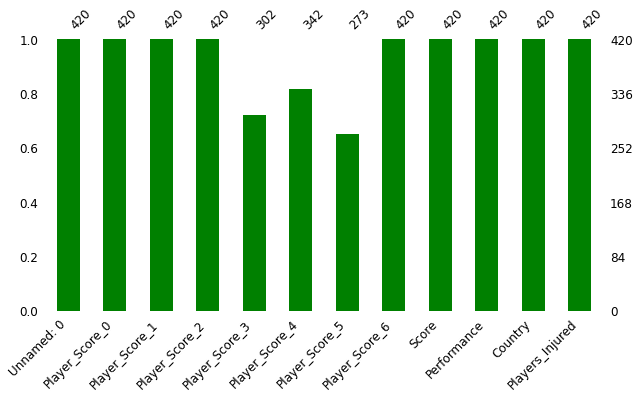

In [284]:
missingno.bar(df_raw.iloc[:,:],color="green", figsize=(10,5), fontsize=12);


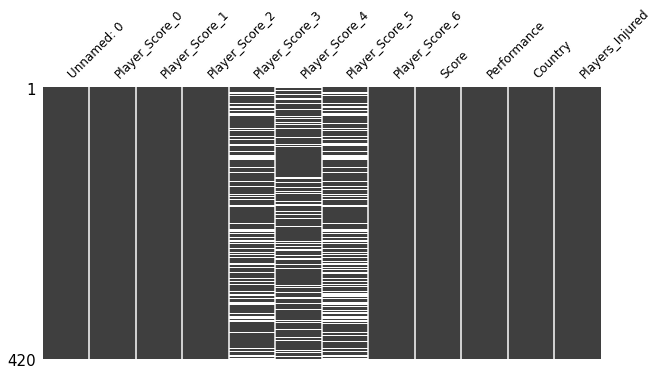

In [285]:
missingno.matrix(df_raw.iloc[:,:],figsize=(10,5), fontsize=12,sparkline=False);


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Player_Score_0'}>,
        <AxesSubplot:title={'center':'Player_Score_1'}>],
       [<AxesSubplot:title={'center':'Player_Score_2'}>,
        <AxesSubplot:title={'center':'Player_Score_3'}>,
        <AxesSubplot:title={'center':'Player_Score_4'}>],
       [<AxesSubplot:title={'center':'Player_Score_5'}>,
        <AxesSubplot:title={'center':'Player_Score_6'}>,
        <AxesSubplot:title={'center':'Score'}>],
       [<AxesSubplot:title={'center':'Players_Injured'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

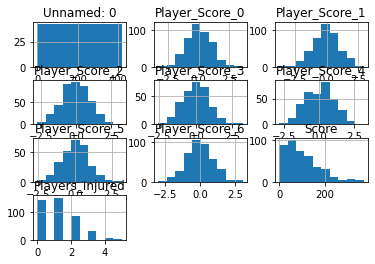

In [286]:
df_raw.iloc[:,:].hist()


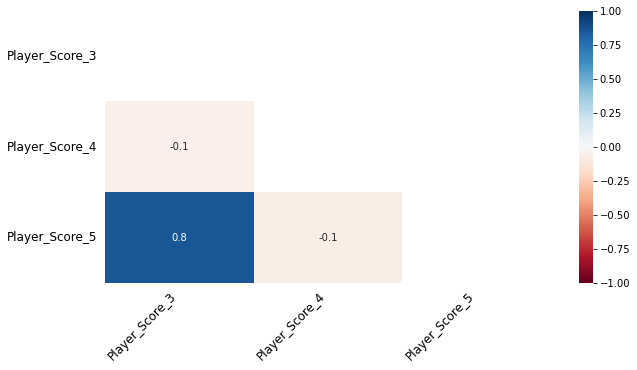

In [287]:
missingno.heatmap(df_raw.iloc[:,:8], figsize=(10,5), fontsize=12);

Making a deep copy of the dataset and using different duplicate filling methods.

In [288]:
df = df_raw.copy(deep=True)
df.drop(columns=['Country', 'Performance','Unnamed: 0'], inplace=True)


## Duplicates with kNN

In [289]:

from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=3)
# fit and transform the imputer on the dataset 
df_knn= pd.DataFrame(knn_imp.fit_transform(df), columns=df.columns)

In [290]:
df_knn.isnull().sum()

Player_Score_0     0
Player_Score_1     0
Player_Score_2     0
Player_Score_3     0
Player_Score_4     0
Player_Score_5     0
Player_Score_6     0
Score              0
Players_Injured    0
dtype: int64

### Plots of before and after

<AxesSubplot:ylabel='Density'>

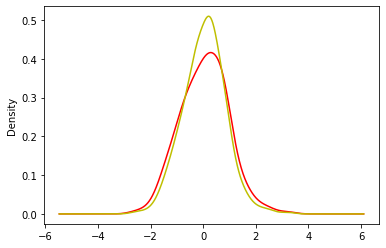

In [291]:
df['Player_Score_5'].plot.kde(color='r')
df_knn["Player_Score_5"].plot.kde(color='y')

0.06357975816122968

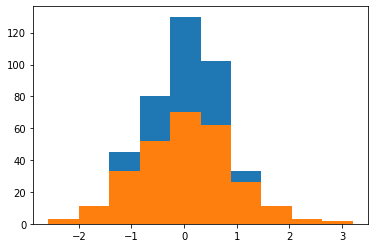

In [292]:
#calculating the jensenshannon distance between the probability distributions before and after imputation
from scipy.spatial import distance

counts_imputed,nins_imputed,values_imputed = plt.hist(df_knn["Player_Score_5"])
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts,nins,values = plt.hist(df["Player_Score_5"])
counts_probabilities = counts / counts.sum()

# pdf distance calculation
distance.jensenshannon(counts_imputed_probabilities,counts_probabilities)


I won't use this because I can't predict a value between non correlated values such as different teams

## Duplicates with Regression

In [293]:
# Create an instance of the class LinearRegression
df = df_raw.copy(deep=True)

df.drop(columns=['Country', 'Performance','Unnamed: 0', 'Player_Score_3', 'Player_Score_4'], inplace=True)

df_new=df.copy(deep=True)

lr = LinearRegression()

df.fillna(0, inplace=True)
df_lr = df[df['Player_Score_5']==0]

traindf = df_new.drop('Player_Score_5',axis=1)

# there are some nan values which is filled with 0, so we could use regression based imputation, if you dropped rows in both test and train df, it works as well. 
y = df_new['Player_Score_5'].fillna(0)

# fit the imputer regression model on the training data.
lr.fit(traindf,y)

df_lr.drop(["Player_Score_5","Player_Score_2"], axis=1,inplace=True)

pred = lr.predict(df_lr)
# impute the blood pressure column with the prediction
df_lr['Player_Score_5'] = pred

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21348\1275939704.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr.drop(["Player_Score_5","Player_Score_2"], axis=1,inplace=True)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Player_Score_2

  warnings.warn(message, FutureWarning)


ValueError: X has 5 features, but LinearRegression is expecting 6 features as input.